# Hotel Booking Cancellation Prediction - EDA
**Objective:** Predict hotel booking for a next booking of the hotel.

## Importing the libraries

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from randomcolor import RandomColor
%matplotlib inline

## Importing the data

In [404]:
data= pd.read_csv('/home/diwas/Documents/DevStuff/Hotel Booking Cancellation/data/raw/hotel_booking.csv')

## Data Exploration

In [405]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [406]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [407]:
# Checking for missing valeues
null_values = data.isnull().sum()
null_values[null_values > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [408]:
# Removing the unnecessary columns
data= data.drop(columns = ['name','email', 'credit_card', 'company'], axis = 1)

In [409]:
# Checking for duplicated values
data.duplicated().sum()

0

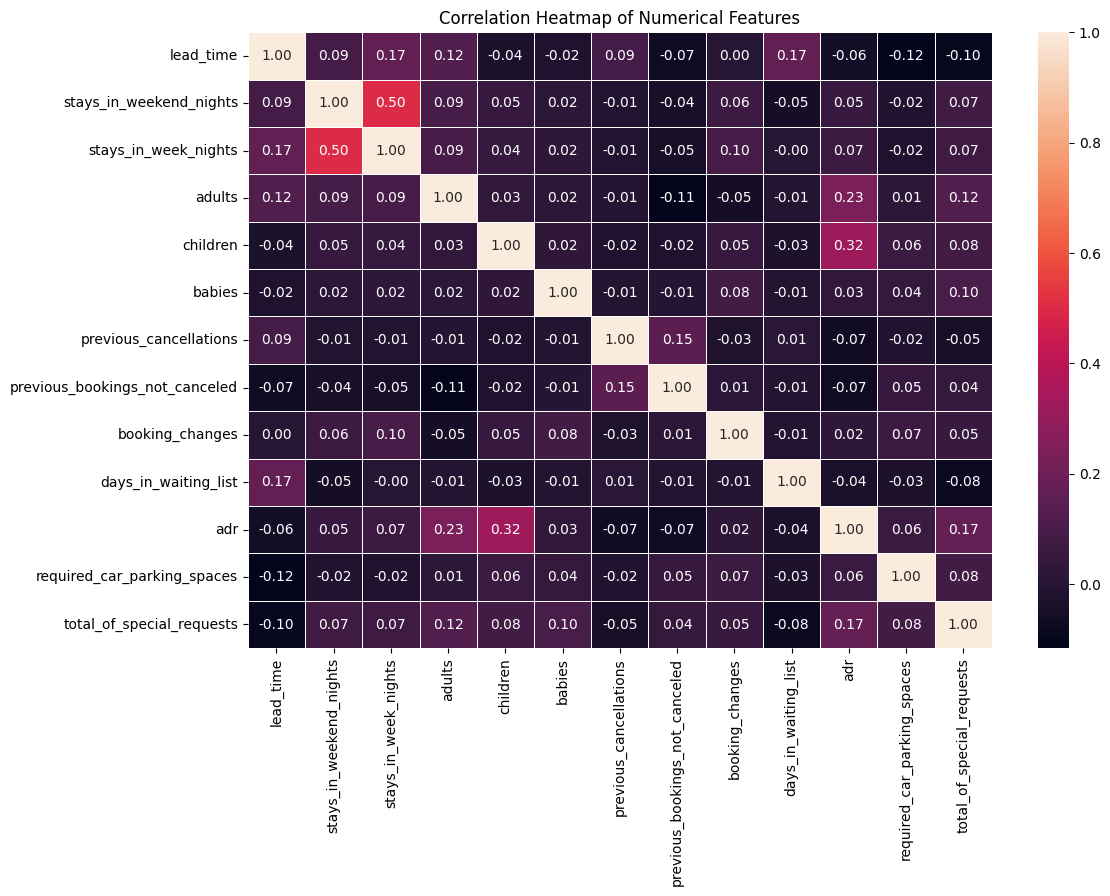

In [410]:
# Correlation matrix
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Analyzing Numerical Variables

<Axes: xlabel='is_canceled', ylabel='count'>

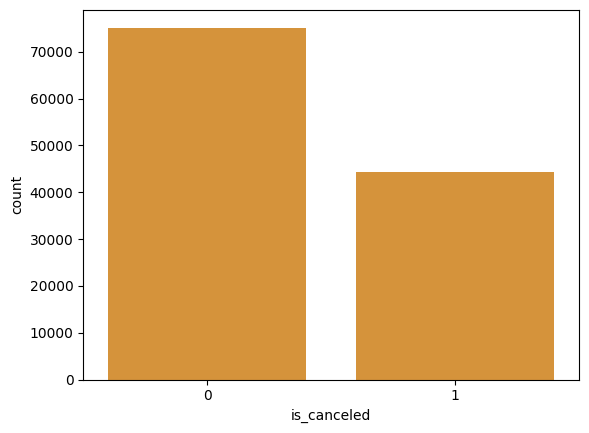

In [411]:
sns.countplot(data = data, x = 'is_canceled', color = RandomColor().generate()[0])

### Analyzing Numerical Variables

### Lead time Analysis

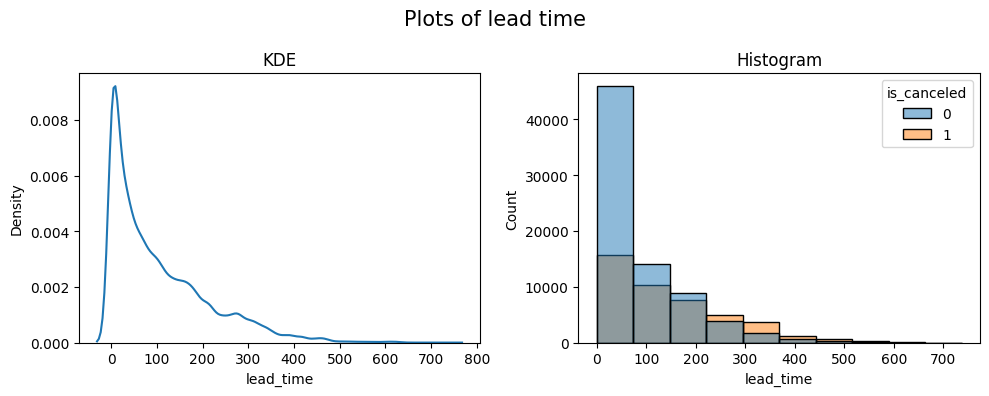

In [412]:
# Leadtime analysis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Plots of lead time', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='lead_time', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='lead_time', bins=10, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations** 
* Bookings with high lead_time(days between arrival and booking) is more likely to be cancelled.
* Positively skewed data.

### Analysis of stays_in_weekend_nights/ stays_in_week_nights

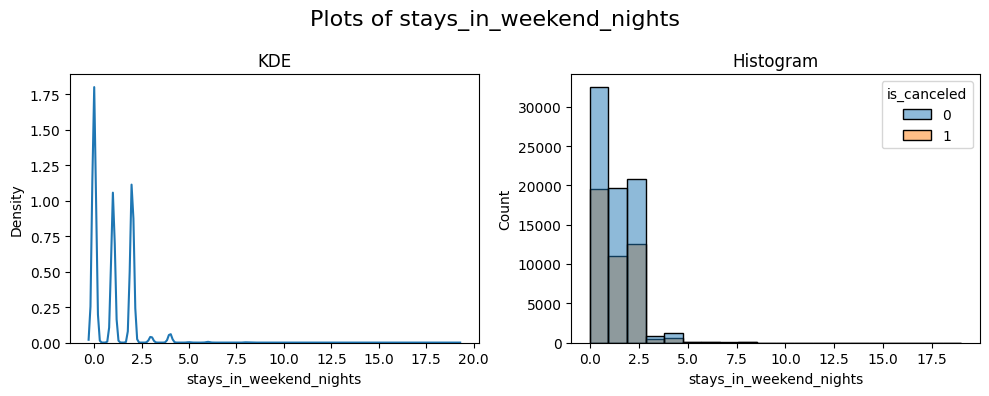

In [413]:
# Making plots of stays in weekend nights
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Plots of stays_in_weekend_nights', fontsize=16)
# KDE plot
sns.kdeplot(data=data, x='stays_in_weekend_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='stays_in_weekend_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

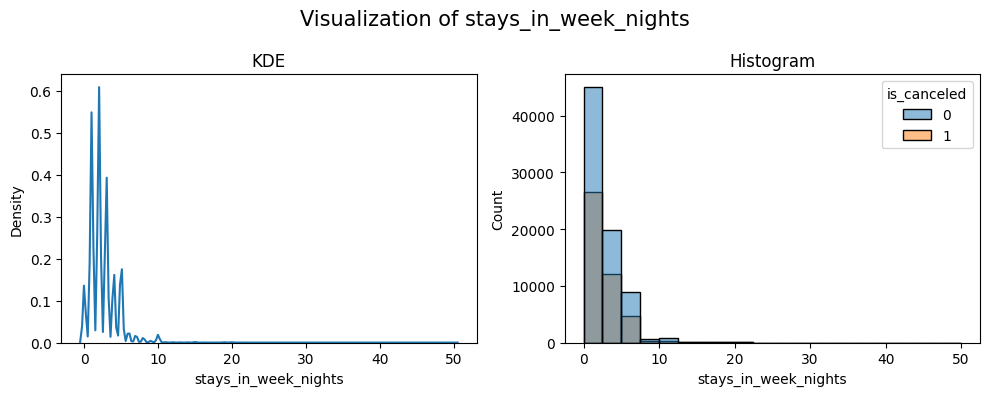

In [414]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of stays_in_week_nights', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='stays_in_week_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='stays_in_week_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

In [415]:
# Creating new feature total nights stayed
data['total_stay_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

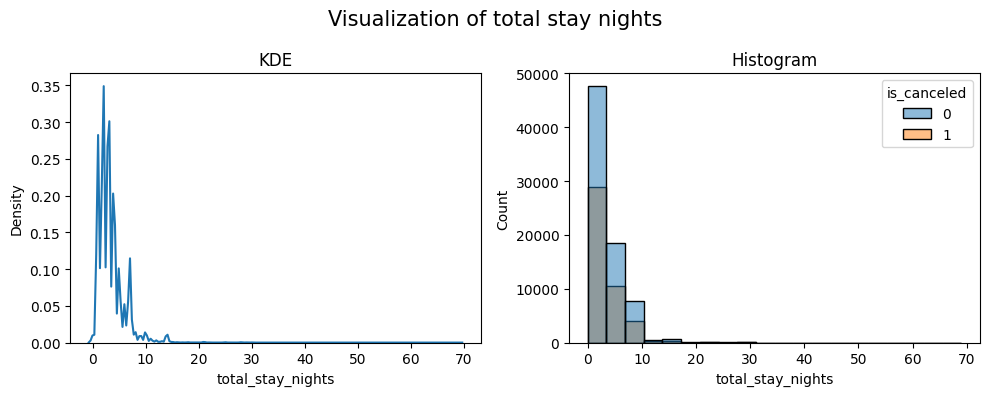

In [416]:
# Visualizing total_members
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total stay nights', fontsize=15)
# KDE plot
sns.kdeplot(data =data, x='total_stay_nights', ax=axes[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data =data, x='total_stay_nights', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations** 
* No such remarkable effect of stays_in_week/weekend_nights variable on cancellation.
* Both stays_in_week/weekend_nights are positively skewed.
* Presense of outliers.

We created new variable total_stay_nights

### Analysis of no. of members babies, adults, children

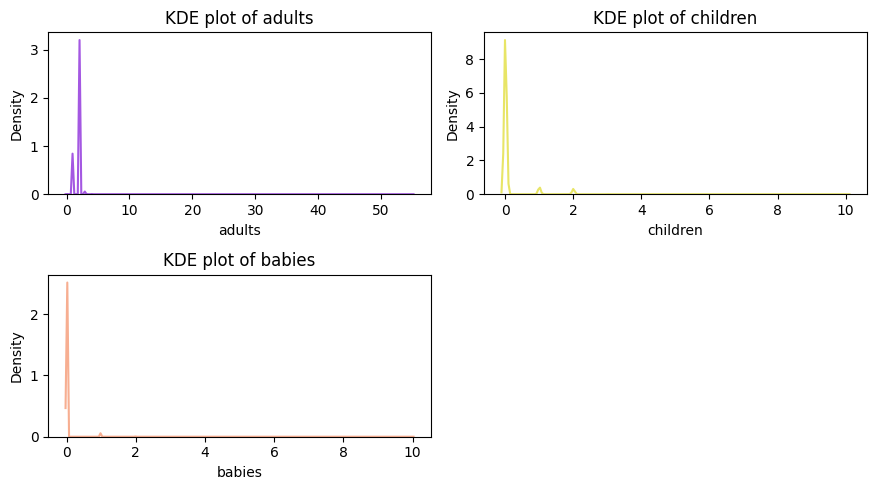

In [417]:
# Explore distributions of these variable
cols_to_plot = ['adults', 'children', 'babies']

# Create subplots
plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.kdeplot(data[feature], color = RandomColor().generate()[0])
    plt.title(f'KDE plot of {feature}')

plt.tight_layout()

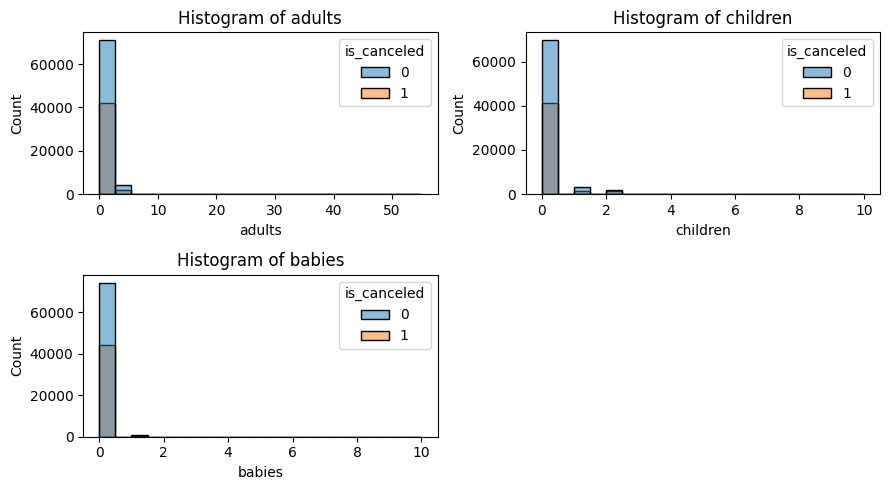

In [418]:
# Create subplots
plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.histplot(data= data, x = feature, bins = 20, hue = 'is_canceled')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()

In [419]:
# Creating a new feature total members
data['total_members'] = data['adults'] + data['children'] + data['babies']

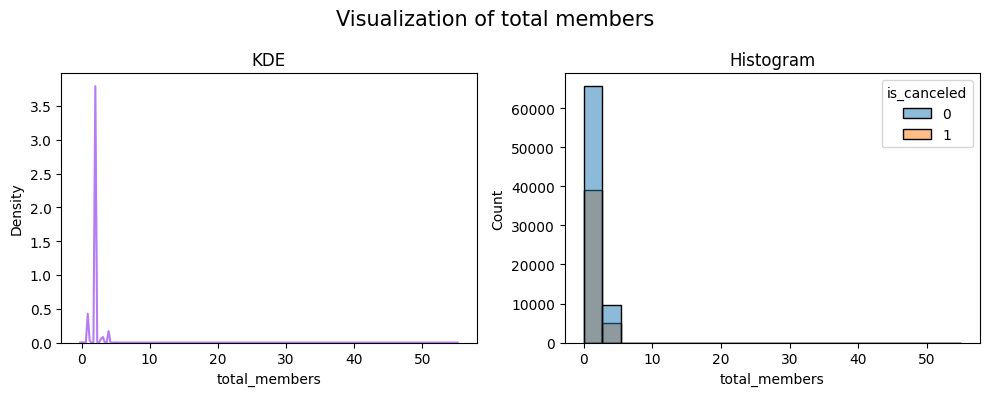

In [420]:
# Visualizing total_members
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total members', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='total_members', ax=axes[0], color = RandomColor().generate()[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='total_members', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* All of the variables denoting members are positively skewed.
* Presense of outliers can be seen.

We created new variable total_members

### Impact of Previous cancellations.

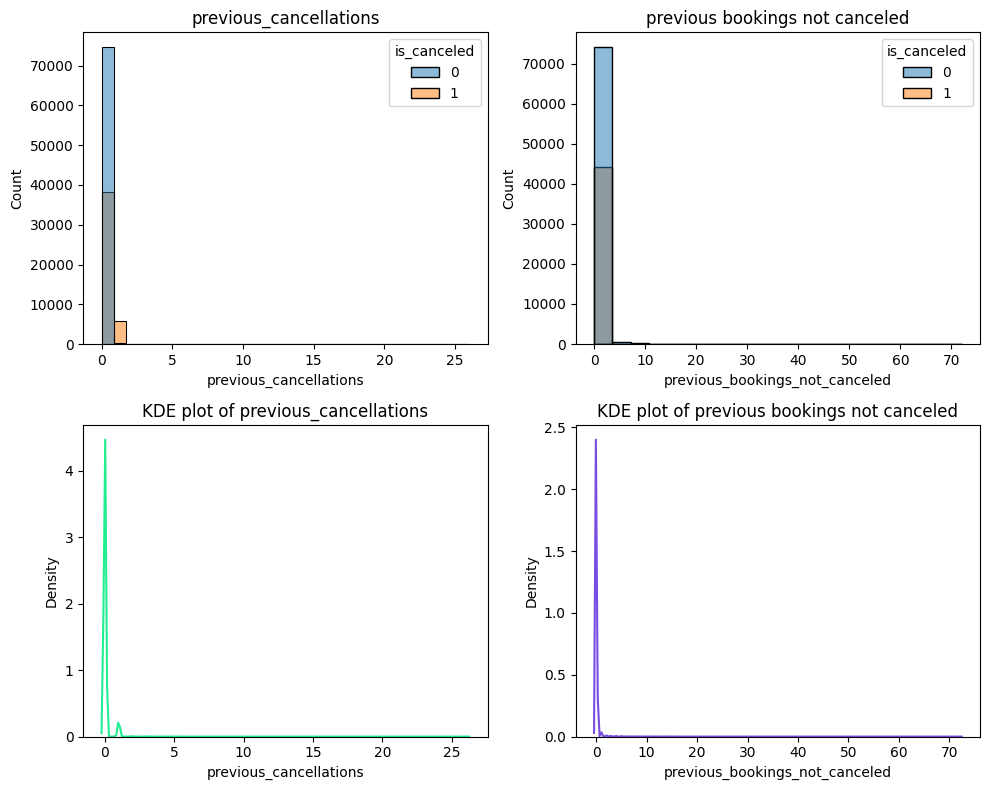

In [421]:
# Visualizing previous cancellation and not previous cancellations 
# Assuming 'is_canceled' is a categorical variable
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Creating histograms with hue
sns.histplot(data=data, x='previous_cancellations', ax=axes[0, 0], bins=30, hue='is_canceled')
axes[0, 0].set_title('previous_cancellations')

sns.histplot(data=data, x='previous_bookings_not_canceled', bins=20, ax=axes[0, 1], hue='is_canceled')
axes[0, 1].set_title('previous bookings not canceled')

# Creating kdeplots
sns.kdeplot(data=data, x='previous_cancellations', ax=axes[1, 0], color = RandomColor().generate()[0])
axes[1, 0].set_title('KDE plot of previous_cancellations')

sns.kdeplot(data=data, x='previous_bookings_not_canceled', ax=axes[1, 1], color = RandomColor().generate()[0])
axes[1, 1].set_title('KDE plot of previous bookings not canceled')

# Adjust layout
plt.tight_layout()


In [422]:
# Creating a new feature total bookings
data['total_bookings'] = data['previous_cancellations'] + data['previous_bookings_not_canceled']

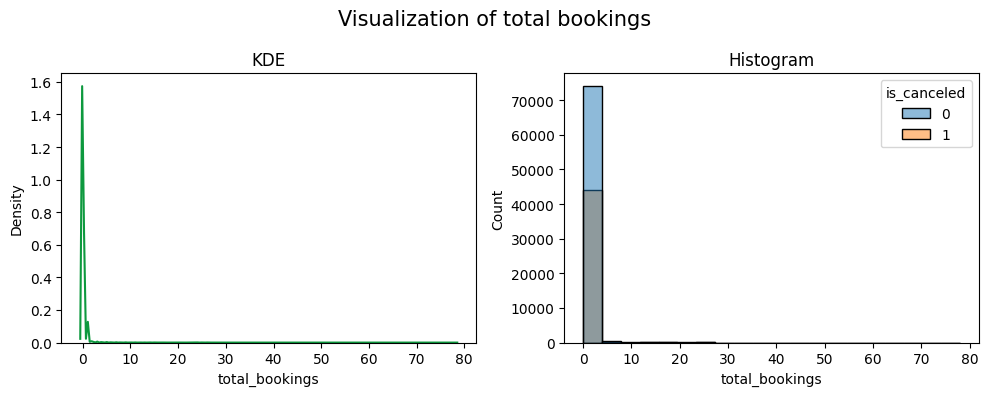

In [423]:
# Creating plots of total bookings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.suptitle('Visualization of total bookings', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='total_bookings', ax=axes[0], color = RandomColor().generate()[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='total_bookings', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* Person with high number of previous cancellations are more likely to cancel the booking.
* Skewed distribution of previous_cancellation/ total_cancellation.

Created new variable total_bookings

### What if customer makes changes in booking ?

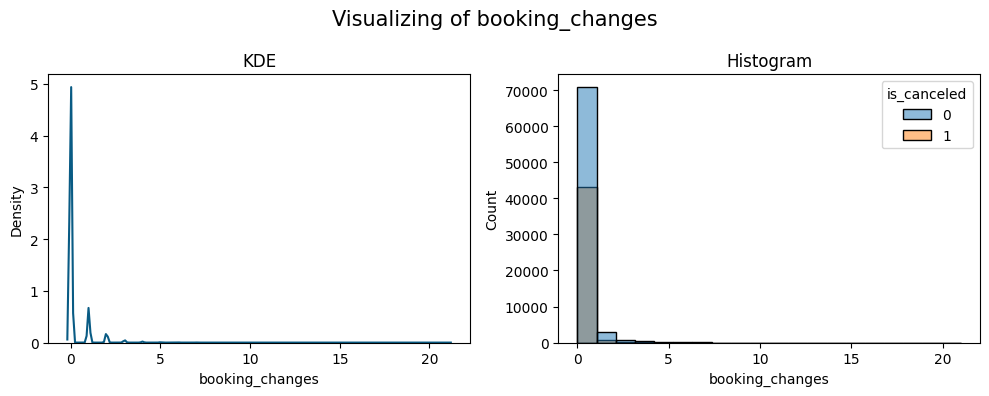

In [424]:
## Creating plots of total bookings
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
plt.suptitle('Visualizing of booking_changes', fontsize=15)
# KDE plot
sns.kdeplot(data=data, x='booking_changes', ax=axes[0], color = RandomColor().generate()[0])
axes[0].set_title('KDE')

# Histogram
sns.histplot(data=data, x='booking_changes', bins=20, ax=axes[1], hue = 'is_canceled')
axes[1].set_title('Histogram')

plt.tight_layout()

**Observations**
* Positive skewed data.

### Other numerical Variables

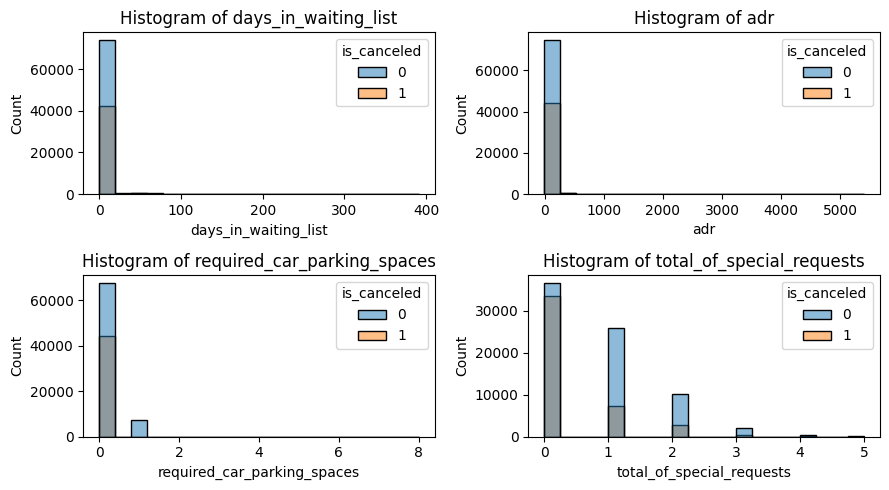

In [425]:
# Explore numerical features
cols_to_plot = ['days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

plt.figure(figsize=(9, 5))
for i, feature in enumerate(cols_to_plot):
    plt.subplot(-(-3 // 2), 2, i+1)
    sns.histplot(data = data, x = feature, bins = 20, hue = 'is_canceled')
    plt.title(f'Histogram of {feature}')

plt.tight_layout()

**Insights**
- Less risk of cancel if total_of_special_requests are higher .
- Those who require car paking spaces also has less cancel rates.

## Analyze Categorical Variables

In [426]:
import warnings
warnings.filterwarnings("ignore")

### Hotel wise cancellation analysis

In [427]:
# Find cancellation rates hotel wise
data_hotel = data.groupby('hotel')['is_canceled'].agg(['count', 'sum']).reset_index()
data_hotel['cancellation_pct'] = data_hotel['sum'] / data_hotel['count'] * 100

In [428]:
data_hotel.head()

,hotel,count,sum,cancellation_pct
0,City Hotel,79330,33102,41.726963
1,Resort Hotel,40060,11122,27.763355


Text(0.5, 1.0, 'Hotel wise cancellation rates')

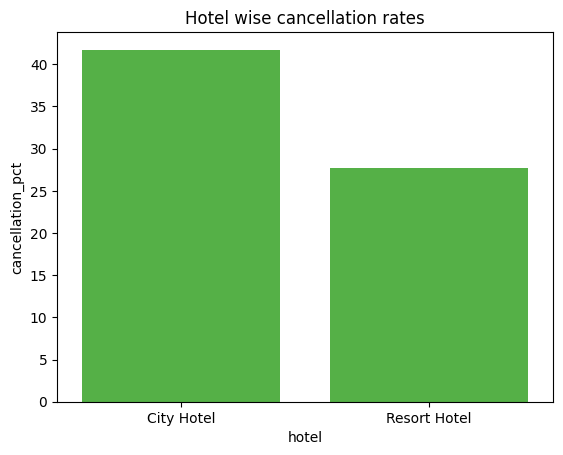

In [429]:
# Creating visualization for hotel wise cancellation rates
sns.barplot(data = data_hotel, x = 'hotel', y = 'cancellation_pct',color = RandomColor().generate()[0])
plt.title('Hotel wise cancellation rates')

**Insights from barplot**
- City hotel has more cancellation rate as compared to resort.
- Around 41% of bookings made for city hotel are canceled where 27% for resort hotel.

### Country wise cancellation rates

In [430]:
# Calculate country wise cancellatin rates
data_country = data.groupby('country')['is_canceled'].agg(['count', 'sum']).reset_index()
data_country['cancellation_pct'] = data_country['sum'] / data_country['count']

In [431]:
data_country.head()

,country,count,sum,cancellation_pct
0,ABW,2,0,0.000000
1,AGO,362,205,0.566298
2,AIA,1,0,0.000000
3,ALB,12,2,0.166667
4,AND,7,5,0.714286


In [432]:
# Ignoring countries with less than 1000 total bookings
data_country = data_country[data_country['count'] > 1000]

Text(0.5, 1.0, 'Country Wise Cancellation Rates')

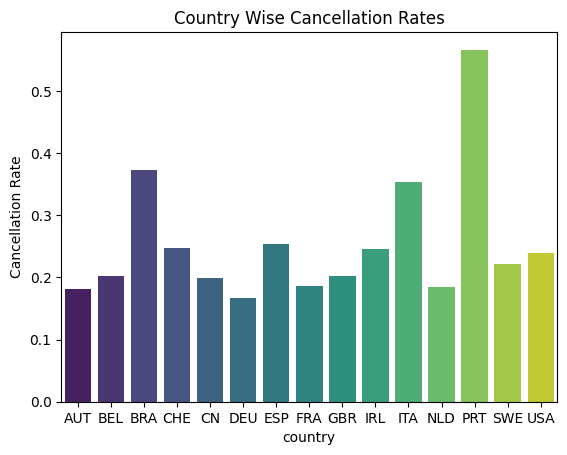

In [433]:
# Creating bar plor for country wise cancellation 
sns.barplot(data = data_country, x = 'country', y = 'cancellation_pct', palette='viridis')
plt.ylabel('Cancellation Rate')
plt.title('Country Wise Cancellation Rates')

**Conclusions**
- PRT(Portugal) has highest cancellation rate.
- Many countries AUT(Austria) DEU(Germany) NLD(Neatherlands) has relatively low cancellation rates.

### Impact of Meal Plan 

In [434]:
# Calculating cancellation rates meal plan wise
value_counts = data['meal'].value_counts()

<Axes: xlabel='meal', ylabel='count'>

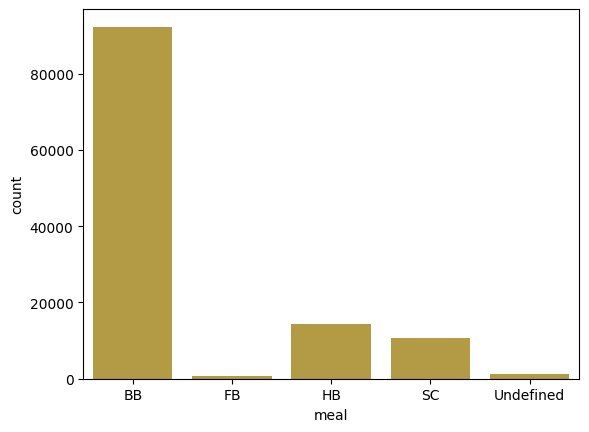

In [435]:
# Creating barplot of meal plans and count
sns.countplot(data = data, x= 'meal', color = RandomColor().generate()[0])

In [436]:
# Creating data for cancellation rate for meal plan
data_meal = data.groupby('meal')['is_canceled'].agg(['count', 'sum']).reset_index()
data_meal['cancellation_pct'] = data_meal['sum'] / data_meal['count'] * 100
data_meal.head()

,meal,count,sum,cancellation_pct
0,BB,92310,34510,37.384899
1,FB,798,478,59.899749
2,HB,14463,4984,34.460347
3,SC,10650,3966,37.239437
4,Undefined,1169,286,24.465355


Text(0.5, 1.0, 'Meal wise cancellation rates')

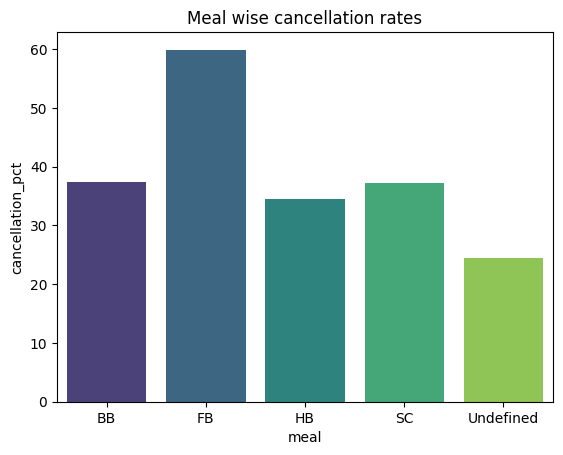

In [437]:
# Creating bar plot meal plean cancellation rates
sns.barplot(data = data_meal, x = 'meal', y = 'cancellation_pct',palette='viridis')
plt.title('Meal wise cancellation rates')

**Observations**
- Presense of missing values in form of "Undefined"
- Booking's with FB(Full Board) meal plan has most cancellation rates.

### Arrival time(year, month, week_number, day_of_month) analysis

#### Analyzing arrival_date_year 

In [438]:
# Calculating total cancellation in each year
data_arrival_year = data.groupby('arrival_date_year')['is_canceled'].agg(['sum']).reset_index()
data_arrival_year.head()

,arrival_date_year,sum
0,2015,8142
1,2016,20337
2,2017,15745


Text(0.5, 1.0, 'Bar Plot of Total Cancellation in Each Year')

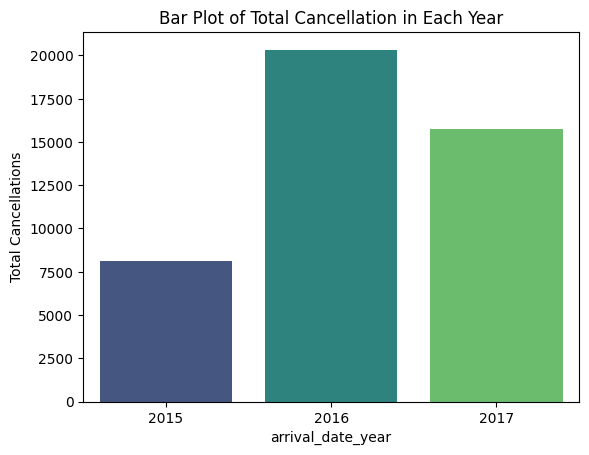

In [439]:
# Lineplot of arrival_date_year with total cancellations
sns.barplot(data = data_arrival_year, x = 'arrival_date_year', y = 'sum', palette='viridis')
plt.ylabel('Total Cancellations')
plt.title('Bar Plot of Total Cancellation in Each Year')


In [440]:
# Removing arrival_date_year becuse not providing much information
data= data.drop(columns = ['arrival_date_year'])

#### Analyzing arrival date month

In [441]:
# Calculate month wise cancellation rattes
data_arrival_month = data.groupby('arrival_date_month')['is_canceled'].agg(['count', 'sum']).reset_index()
data_arrival_month['cancellation_pct'] = data_arrival_month['sum'] / data_arrival_month['count']

In [442]:
# Sort the month in order of increasing month
month_map = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June':6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data['arrival_date_month_num'] = data['arrival_date_month'].map(month_map)
sorted_data= data.sort_values(by=['arrival_date_month_num'],ascending=True)
data_arrival_month.head()

,arrival_date_month,count,sum,cancellation_pct
0,April,11089,4524,0.407972
1,August,13877,5239,0.377531
2,December,6780,2371,0.349705
3,February,8068,2696,0.334160
4,January,5929,1807,0.304773


Text(0.5, 1.0, 'Bar Plot of Cancellation Percentage for Arrival Date Month')

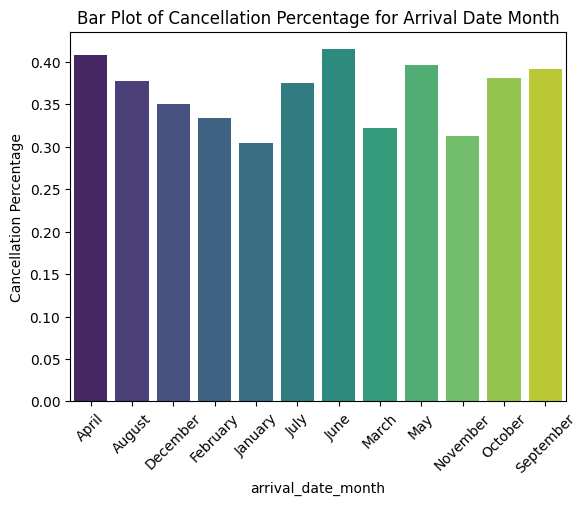

In [443]:
sns.barplot(data = data_arrival_month, x = 'arrival_date_month', y = 'cancellation_pct', palette='viridis')
plt.xticks(rotation = 45)
plt.ylabel('Cancellation Percentage')
plt.title('Bar Plot of Cancellation Percentage for Arrival Date Month')

**Insights**
- Booking made in the month of April and June has most risk to be canceled.
- Where bookings in november january march are less likely to be canceled.
- Cancellation rates are increasing from December to June.
- From June- November is seems to be decreasing cancellation rates.

#### Analyze arrival date week number

In [444]:
# Calculate arrival date week wise cancellation rates
data_arrival_week_number = data.groupby('arrival_date_week_number')['is_canceled'].agg(['count', 'sum']).reset_index()
data_arrival_week_number['cancellation_pct'] = data_arrival_week_number['sum'] / data_arrival_week_number['count']

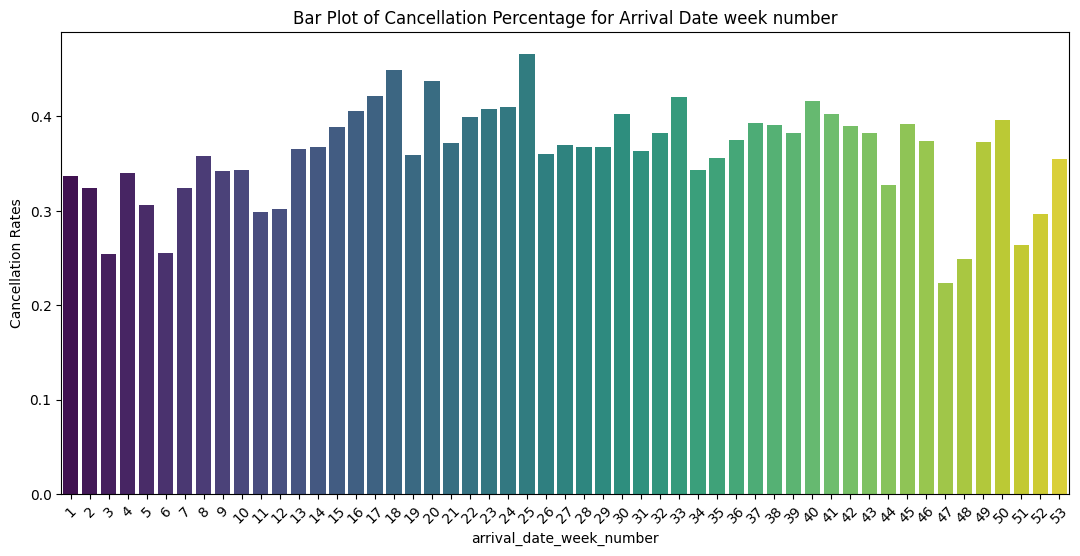

In [445]:
# Barplot of arrival date week number
plt.figure(figsize = (13, 6))
sns.barplot(data = data_arrival_week_number, x = 'arrival_date_week_number', y = 'cancellation_pct', palette='viridis')
plt.ylabel('Cancellation Rates')
plt.title('Bar Plot of Cancellation Percentage for Arrival Date week number')
plt.xticks(rotation = 45)
plt.show()

**arrival_date_week_number:** is week number of that year in which customer will be arriving at hotel.For example if customer arrives in Januray 29 then arrival_date_week_number will be 5.

**Insights**
- Plot has Same behaviour as of arrival_date_month with more detail.

#### Analyzing arrival_date_day_of_month

In [446]:
# Calculate arrival date day of month wise cancellation rates
data_arrival_day_of_month = data.groupby('arrival_date_day_of_month')['is_canceled'].agg(['count', 'sum']).reset_index()
data_arrival_day_of_month['cancellation_pct'] = data_arrival_day_of_month['sum'] / data_arrival_day_of_month['count']
data_arrival_day_of_month = data_arrival_day_of_month.sort_values(by = 'arrival_date_day_of_month')

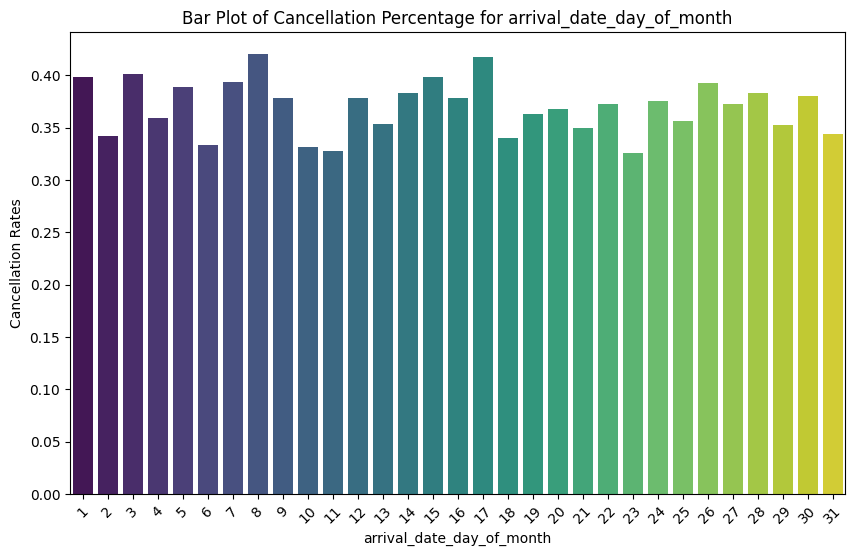

In [447]:
# Barplot of arrival 
plt.figure(figsize = (10, 6))
sns.barplot(data = data_arrival_day_of_month, x = 'arrival_date_day_of_month', y = 'cancellation_pct', palette='viridis')
plt.ylabel('Cancellation Rates')
plt.title('Bar Plot of Cancellation Percentage for arrival_date_day_of_month')
plt.xticks(rotation = 45)
plt.show()

### What if guest is repeated

In [448]:
# Checking for unique values
data['is_repeated_guest'].value_counts()

is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64

In [449]:
# Calculating cancellation percentage of repeated and not repeated guest
data_is_repeated_guest = data.groupby('is_repeated_guest')['is_canceled'].agg(['count', 'sum']).reset_index()
data_is_repeated_guest['cancellation_pct'] = data_is_repeated_guest['sum'] / data_is_repeated_guest['count']

Text(0.5, 1.0, 'Bar Plot Showing Cancellation Rates For Repeated & Non Repeated Guests')

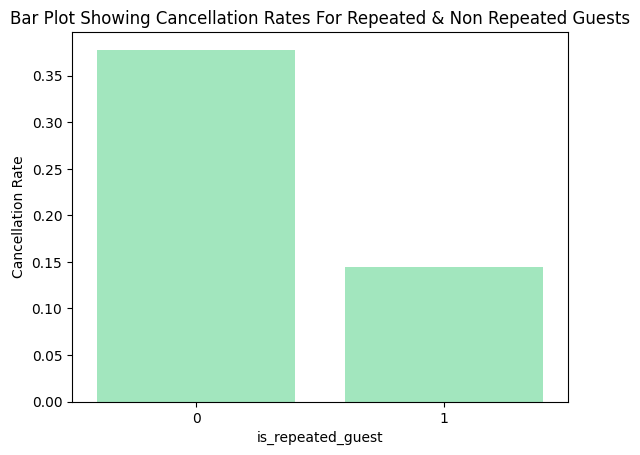

In [450]:
# Creating count plot
sns.barplot(data = data_is_repeated_guest, x = 'is_repeated_guest', y = 'cancellation_pct', color = RandomColor().generate()[0])
plt.ylabel('Cancellation Rate')
plt.title('Bar Plot Showing Cancellation Rates For Repeated & Non Repeated Guests')

**Insights**
- Most of the guest are not repeated.
- Most of cancellation's are made by non repeated guests
- Only 14% of repeated guests cancel where this value goes to 37% when it comes to non repeated guests.

#### Analyze market segment

In [451]:
# Find unique vales
data['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For Different Marcket Segment')

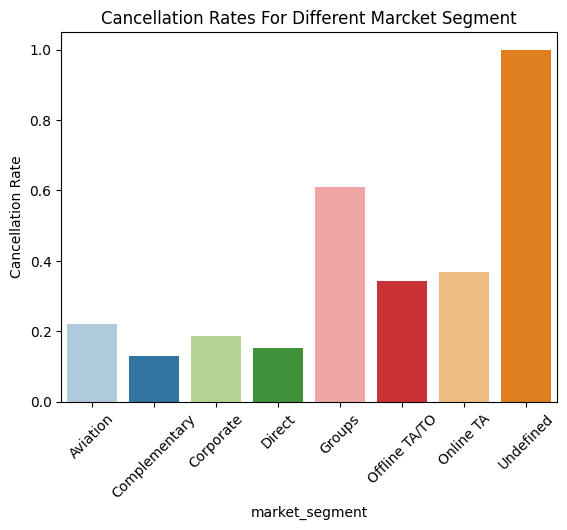

In [452]:
# Calculating cancellation rate

data_market_segment = data.groupby('market_segment')['is_canceled'].agg(['count', 'sum']).reset_index()
data_market_segment['cancellation_pct'] = data_market_segment['sum'] / data_market_segment['count']
# Creating plot
sns.barplot(data = data_market_segment, x = 'market_segment', y = 'cancellation_pct', palette = 'Paired')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation = 45)
plt.title('Cancellation Rates For Different Marcket Segment')


**Insights**
- Groups has most of the cancellation.
- Presense of missing values in form of Undefined

### Analyze distribution channel

In [453]:
# Find unique vales
data['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For different distribution_channel')

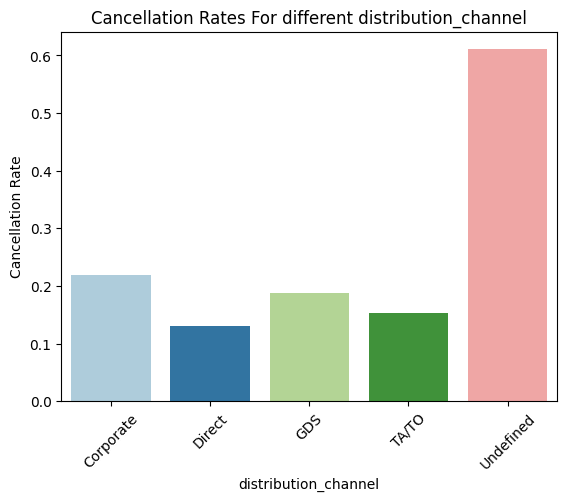

In [454]:
# Calculating cancellation rate
data_distribution_channel = data.groupby('distribution_channel')['is_canceled'].agg(['count', 'sum']).reset_index()
data_distribution_channel['cancellation_pct'] = data_market_segment['sum'] / data_market_segment['count']
# Creating plot
sns.barplot(data= data_distribution_channel, x = 'distribution_channel', y = 'cancellation_pct', palette = 'Paired')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation = 45)
plt.title('Cancellation Rates For different distribution_channel')


**Insights**
- Corporate has most cancellation rates.
- Presense of missing values i.e Undefined.

#### reserved/assigned_room_type anaysis

In [455]:
data[['reserved_room_type']].value_counts()

reserved_room_type
A                     85994
D                     19201
E                      6535
F                      2897
G                      2094
B                      1118
C                       932
H                       601
P                        12
L                         6
Name: count, dtype: int64

In [456]:
data[['assigned_room_type']].value_counts()

assigned_room_type
A                     74053
D                     25322
E                      7806
F                      3751
G                      2553
C                      2375
B                      2163
H                       712
I                       363
K                       279
P                        12
L                         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Total Cancellation For different assigned_room_type')

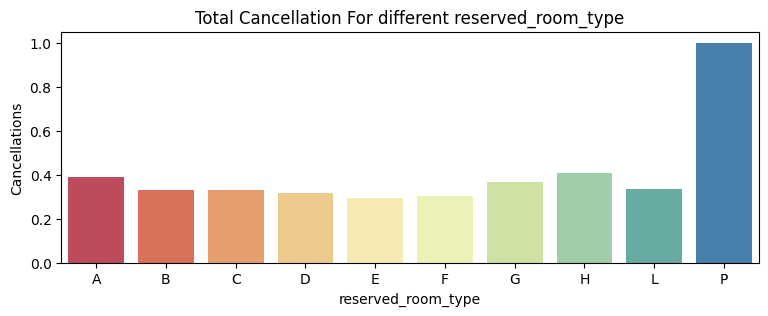

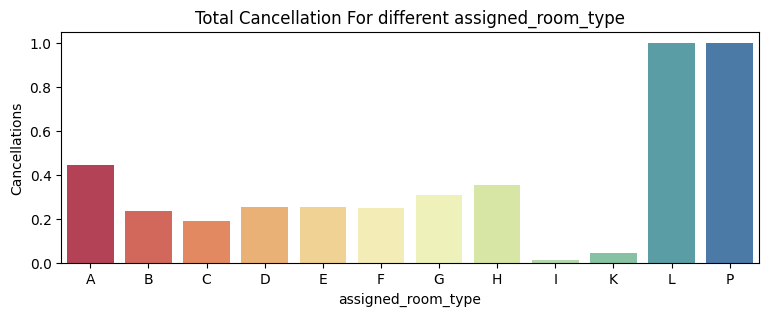

In [457]:
# Calculating cancellation rate
plt.figure(figsize=(9, 3))
variable = 'reserved_room_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = "Spectral")
plt.ylabel('Cancellations')
plt.title(f'Total Cancellation For different {variable}')

# For assigned room type
plt.figure(figsize=(9, 3))
variable = 'assigned_room_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = "Spectral")
plt.ylabel('Cancellations')
plt.title(f'Total Cancellation For different {variable}')



### deposit_type variable

In [458]:
# Check unique values
data[['deposit_type']].value_counts()

deposit_type
No Deposit      104641
Non Refund       14587
Refundable         162
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For different deposit_type')

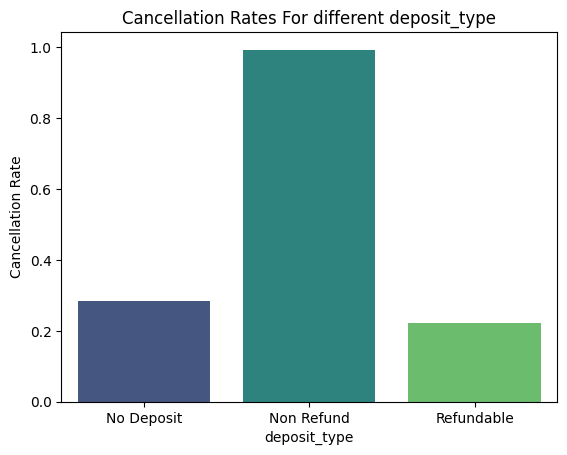

In [459]:
variable = 'deposit_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = 'viridis')
plt.ylabel('Cancellation Rate')
plt.title(f'Cancellation Rates For different {variable}')

- High risk of cancellation with Non Refund deposit type.

#### customer_type variable

In [460]:
data['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

Text(0.5, 1.0, 'Cancellation Rates For different customer_type')

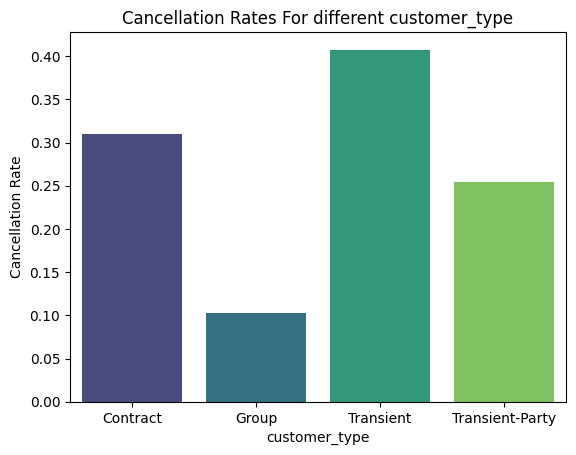

In [461]:
variable = 'customer_type'
cancel_rate_data= data.groupby(variable)['is_canceled'].agg(['count', 'sum']).reset_index()
cancel_rate_data['cancellation_pct'] = cancel_rate_data['sum'] / cancel_rate_data['count']
# Creating plot
sns.barplot(data= cancel_rate_data, x = variable, y = 'cancellation_pct', palette = 'viridis')
plt.ylabel('Cancellation Rate')
plt.title(f'Cancellation Rates For different {variable}')

- Customer Type Transient has highest cancel rates.

#### revervation_status variable

In [462]:
data['reservation_status'].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

- We can remove reservation_status variabe

### agent variable

In [463]:
data['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

* agent variable is an id for agent which is not required for modeling thus we can remove it.

### Hypothesis testing

In [ ]:
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_members', 'total_stay_nights']


In [ ]:
from scipy.stats import shapiro

In [ ]:
# Normality test for numerical features
normal_cols= []
for feature in numerical_features:
    stat, p_value = shapiro(data[feature])
    print(f'{feature}: test_stat,',str(stat)[0:4], 'p_value', p_value)

# Deal with missing values

In [ ]:
# Dealing with Undefind in categorical columns
for col in data.columns:
    len_undata= len(data[data[col] == 'Undefined'])
    if len_undata > 0:
        print(f'{col}: has total undefined of {len_undata}')

In [ ]:
# Impute Undefined values with the most frequent category
data['meal'].replace('Undefined', data['meal'].mode()[0], inplace=True)
data['market_segment'].replace('Undefined', data['market_segment'].mode()[0], inplace=True)
data['distribution_channel'].replace('Undefined', data['distribution_channel'].mode()[0], inplace=True)

In [ ]:
# Dealing with NaN values
# Impure of cateogircal columns
data['country'].fillna(data['country'].mode()[0], inplace=True)
data['agent'].fillna(data['agent'].mode()[0], inplace=True)

# Impute of continous values
data['children'].fillna(data['children'].median(), inplace=True)

### Dealing with outliers

In [ ]:
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

In [ ]:
# Set up subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
fig.suptitle('Box Plots for Numerical Features', y=1.02)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create individual box plots for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data[feature], ax=axes[i], width=0.5)
    axes[i].set_title(feature)
    axes[i].set_xlabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Function to find columns with outliers using IQR method
def get_columns_with_outliers_iqr(dataframe, features):
    columns_with_outliers = []
    
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify columns with outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = dataframe[(dataframe[feature] < lower_bound) | (dataframe[feature] > upper_bound)][feature]

        if not outliers.empty:
            columns_with_outliers.append(feature)

    return columns_with_outliers

# Get columns with outliers using IQR method
outlier_columns = get_columns_with_outliers_iqr(data, numerical_features)

# Display the columns with outliers
print("Columns with outliers using IQR method:", outlier_columns)

In [ ]:
# Function to replace outliers with upper/lower bounds using IQR method
def replace_outliers_with_bounds(dataframe, features):
    for feature in features:
        Q1 = dataframe[feature].quantile(0.25)
        Q3 = dataframe[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with bounds
        dataframe[feature] = dataframe[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        
# Replace outliers with upper/lower bounds using IQR method
replace_outliers_with_bounds(data, outlier_columns)